In [76]:
import pyforest
from pyforest import *
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

pyforest.active_imports()

import numpy as np


['import numpy as np']

## Import Dataset

In [77]:
data = r"C:\Users\Boborodono\Desktop\San_Antonio\Resources\Cleaned_Dataset\Parquet\clean_stroke.parquet.gzip"
df = pd.read_parquet(data)
df

,ID#,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Lvl,BMI,Smoker,Stroke
0,1,Male,67,0,1,Yes,Private,Urban,228.69,36.6,Former,1
1,2,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,Never,1
2,3,Male,80,0,1,Yes,Private,Rural,105.92,32.5,Never,1
3,4,Female,49,0,0,Yes,Private,Urban,171.23,34.4,Current,1
4,5,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,Never,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,5106,Female,80,1,0,Yes,Private,Urban,83.75,NaN,Never,0
5105,5107,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,Never,0
5106,5108,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,Never,0
5107,5109,Male,51,0,0,Yes,Private,Rural,166.29,25.6,Former,0


## Drop ID Column

In [78]:
df.drop(columns=["ID#"], inplace=True)

## Normalize numerical attributes

In [79]:
# Create a new column for normalized age
df['age_norm']=(df['Age']-df["Age"].min())/(df["Age"].max()-df["Age"].min())

# Create a new column for normalized avg glucose level
df["glucose_norm"] = (df["Avg_Glucose_Lvl"] - df["Avg_Glucose_Lvl"].min())/(df["Avg_Glucose_Lvl"].max() - df["Avg_Glucose_Lvl"].min())

# Create a new column for normalized avg bmi
df['bmi_norm'] = (df["BMI"] - df["BMI"].min())/(df["BMI"].max() - df["BMI"].min())

## Discretize Numerical Attributes

In [80]:
# Discretize with respective equal width bin

age_bins = [0, 20, 40, 60, 80, 100]
age_names = ["Gen Z", "Millenials", "Generation X", "Baby Boomers", "Greatest Generation"]
df['age_binned'] = pd.cut(df["Age"], age_bins, labels=age_names)

# Establish and discretize the bins for the glucose level
glucose_bins = [0, 100, 125, 280]
glucose_names = ["Normal (<100)", "Prediabetic (100-125)", "Diabetic (>125)"]
df['glucose_binned'] = pd.cut(df["Avg_Glucose_Lvl"], glucose_bins, labels=glucose_names)

# Establish and discretize the bins for the bmi
bmi_bins = [0,18.5, 25, 30, 35, 40, 100]
bmi_names = ["Underweight", "Healthy Weight", "Overweight", "Obese (Low-Risk)", "Obese (Medium-Risk)", "Obese (High-Risk)"]
df['bmi_binned'] = pd.cut(df["BMI"], bmi_bins, labels=bmi_names)

df

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Lvl,BMI,Smoker,Stroke,age_norm,glucose_norm,bmi_norm,age_binned,glucose_binned,bmi_binned
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,Former,1,0.817073,0.801265,0.301260,Baby Boomers,Diabetic (>125),Obese (Medium-Risk)
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,Never,1,0.743902,0.679023,NaN,Baby Boomers,Diabetic (>125),NaN
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,Never,1,0.975610,0.234512,0.254296,Baby Boomers,Prediabetic (100-125),Obese (Low-Risk)
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,Current,1,0.597561,0.536008,0.276060,Generation X,Diabetic (>125),Obese (Low-Risk)
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,Never,1,0.963415,0.549349,0.156930,Baby Boomers,Diabetic (>125),Healthy Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,80,1,0,Yes,Private,Urban,83.75,NaN,Never,0,0.975610,0.132167,NaN,Baby Boomers,Normal (<100),NaN
5105,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,Never,0,0.987805,0.323516,0.340206,Greatest Generation,Diabetic (>125),Obese (Medium-Risk)
5106,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,Never,0,0.426829,0.128658,0.232532,Millenials,Normal (<100),Obese (Low-Risk)
5107,Male,51,0,0,Yes,Private,Rural,166.29,25.6,Former,0,0.621951,0.513203,0.175258,Generation X,Diabetic (>125),Overweight


# EDA Begins

## Correlation HeatMap

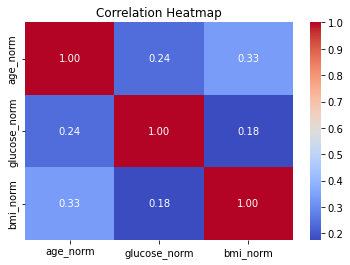

In [81]:
# Create the Heatmap
heatmap = sns.heatmap(df[['age_norm', 'glucose_norm', 'bmi_norm']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
# Create the title
heatmap.set_title("Correlation Heatmap");

## GET_STACKED_BAR_CHART algorithm

In [82]:
def get_stacked_bar_chart(column):
    # Get the count of records by column and stroke
    df_pct = df.groupby([column, "Stroke"])['Age'].count()
    # Create proper DataFrame's Format
    df_pct = df_pct.unstack()
    return df_pct.plot.bar(stacked=True, figsize=(6.6), width=1);

## GET_100_PERCENT_STACKED_BAR_CHART algorithm

In [83]:
def get_100_percent_stacked_bar_chart(column, width = 0.5):
    # Gt the count of records by column and stroke
    df_breakdown = df.groupby([column, "Stroke"])["Age"].count()
    # Get the count of records by gender
    df_total = df.groupby([column])["Age"].count()
    # Get the percentage for 100% Stacked Bar Chart
    df_pct = df_breakdown /df_total * 100
    # Create proper DataFrames format
    df_pct = df_pct.unstack()
    return df_pct.plot.bar(stacked=True, figsize=(6.6), width=width);

## Age Histogram

In [84]:
get_stacked_bar_chart('age_binned')

TypeError: from_bounds() argument after * must be an iterable, not float

## Age Stacked Bar

## BMI Histogram

## BMI Stacked Bar

## Average Glucose Histogram

## Average Glucose Stacked Bar

## HyperTension

## Heart Disease

## Gender, Residence Type

## Work-Type

In [ ]:
get_100_percent_stacked_bar_chart('Work_Type')
df.groupby(['Work_Type'])[['Age']].agg(['count', 'mean'])

TypeError: from_bounds() argument after * must be an iterable, not float

## Ever-Married